# QuTip Practice Codes

In [1]:
import qutip

D:\anacondafinal\lib\site-packages\qutip\__init__.py:66: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


In [6]:
from qutip import *
import numpy as np
from numpy import linalg
from scipy import linalg as splinalg
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from scipy import sparse as sp
import scipy.sparse.linalg
from functools import reduce
from sklearn.preprocessing import normalize
import itertools

In [ ]:
# We make use of Quantum Object Class using matrix representation
# since we need a data structure to store the properties of a 
# quantum operator and its eigenstates and values.
# The output corresponds to a 1X1 matrix with one zero entry.
# Names of classes are capitalized unlike the functions in Python
print(Qobj(), '\n \n********************** \n')

# Creating a user-defined data set by passing them in the form of
# arrays into the Q. Object class
print(Qobj([[1], [2], [3], [4], [5]]), '\n \n********************** \n') # 5X1 matrix - column vector

x = np.array([[1, 2, 3, 4, 5]])
print(Qobj(x), '\n \n********************** \n')

r = np.random.rand(4, 4)
print(Qobj(r), '\n \n********************** \n')

# Although dims and shape appear to be the same,
# dims keep track of the shapes of the individual 
# components of a multipartite system - check tensor section

# QuTip has built-in functions of commonly used state vectors
# Fock state ket vector: N = no. of levels in Hilbert space, #m = level containing excitation
N = 4
m = 0
alpha = 4+1j
f = fock(4, 3)
print(f, '\n \n********************** \n')

#Empty ket vector
zero_ket(N)

#Fock density matrix (outer product of basis) - hermitian by default
# Arguments same as fock(N,m)
fock_dm(N,3)

#Coherent state, alpha = complex no. (eigenvalue)
coherent(N,alpha)

#Coherent density matrix (outer product)
coherent_dm(N,alpha)

#Thermal density matrix (for n particles), n = particle number expectation value 
print(thermal_dm(N,1010)) # What does this mean by particle number expectation value?

print(coherent_dm(N,alpha).dims) 

In [ ]:
q = destroy(4)
print(q)

In [ ]:
x = sigmax()

In [ ]:
q + 5

In [ ]:
x * x

In [ ]:
q ** 3

In [ ]:
x / np.sqrt(2)

In [ ]:
vac = basis(5, 0)
print(vac)
a = destroy(5)
print(a)

In [ ]:
print(a.dag())
print(a.dag() * vac)

In [ ]:
c = create(5)
print(c)

In [ ]:
print(c * vac)

In [ ]:
print(c * c * vac)
print(c ** 2 * vac)

In [ ]:
print(c * a * vac) # Applying number operator on |0>
print(c*a)

In [ ]:
print(c * a * (c * vac)) # Applying number operator on |1>

In [ ]:
print(c * a * (c**2 * vac).unit()) # Applying number operator on |2>

In [ ]:
ket = basis(5, 2)
print(ket)
n = num(5)
print(n)
print(n * ket)
ket = (basis(5, 0) + basis(5, 1)).unit()
print(ket)
print(n * ket)

In [ ]:
ket = basis(5, 2)
print(ket * ket.dag())

In [ ]:
print(fock_dm(5, 2))

In [ ]:
print(ket2dm(ket))

In [ ]:
x = coherent_dm(5, 1.25)

y = coherent_dm(5, np.complex(0, 1.25))  # <-- note the 'j'

z = thermal_dm(5, 0.125)

print(np.testing.assert_almost_equal(fidelity(x, x), 1))

np.testing.assert_almost_equal(hellinger_dist(x, y), 1.3819080728932833)


In [ ]:
vac = basis(5, 0)
print(vac)

one = basis(5, 1)
print(one)

c = create(5)
print(c)

N = num(5)
print(N)

np.testing.assert_almost_equal(expect(N, vac), 0)

np.testing.assert_almost_equal(expect(N, one), 1)

coh = coherent_dm(5, 1.0j)

np.testing.assert_almost_equal(expect(N, coh), 0.9970555745806597)

cat = (basis(5, 4) + 1.0j * basis(5, 3)).unit()

np.testing.assert_almost_equal(expect(c, cat), 0.9999999999999998j)
print(expect(N, (c**2 * vac).unit()))

In [ ]:
Sxi = sigmax()
Sxi1 = sigmax()

# Using Numpy and Scipy

In [ ]:
## Defining XY Hamiltonian 1D - nearest neighbor interactions only
sx = np.array([[0,1], [1, 0]])
sy = np.array([[0, -1j], [1j, 0]])
iden = np.eye(2)
sx1sx2 = np.matmul(np.kron(sx, iden),np.kron(iden, sx))
sy1sy2 = np.matmul(np.kron(sy, iden),np.kron(iden, sy))
H = sx1sx2 + sy1sy2
# print(H)
N = 2
Hm = np.zeros((2**N, 2**N), dtype = np.complex_)
Sxisxi1 = np.zeros((2**N, 2**N), dtype = np.complex_)
Syisyi1 = np.zeros((2**N, 2**N), dtype = np.complex_)
for i in range(N):
    Sxisxi1 = np.matmul(np.kron(sx, np.eye(2**(N-1))), np.kron(np.eye(2**(N-1)), sx))
    Syisyi1 = np.matmul(np.kron(sy, np.eye(2**(N-1))), np.kron(np.eye(2**(N-1)), sy))
    Hm += Sxisxi1 + Syisyi1  

# normed_matrix = normalize(Hm, axis=1, norm='l1') - applicable only for real entry matrices
print(Hm)

In [3]:
from scipy import linalg
from scipy.linalg import expm, sinm, cosm

# Pauli Matrices
sigmaZ = sp.csc_matrix([[1, 0], [0, -1]])
sigmaX = sp.csc_matrix([[0, 1], [1, 0]])
sigmaY = sp.csc_matrix([[0, -1j], [1j, 0]])
sigmaI = sp.csc_matrix([[1, 0], [0, 1]])
sigmaH = sp.csc_matrix([[1, 1], [1, -1]])

Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
I = np.array([[1, 0], [0, 1]])

H = np.array([[1, 1], [1, -1]])

params = {
'N' : 1,
'tau_list':[1, 0.5, 0.1, 0.05],
'tau': 0.1,
'n': 2,
'alpha': 1,
'T': 10,
'opH': [X, Y], # Need to change this specific to Model
'pulses': [I, Z] # Need to change this specific to Model
}

def normalizeWF(psi,**kwargs):
    shape, dtype = psi.shape, psi.dtype
    if np.array_equal(psi, np.zeros(shape, dtype = dtype)) == True:
        NWF = psi
    else:
        NWF = psi/(np.sqrt(np.vdot(psi, psi)))
    return NWF

def sparseMatrices(a, **kwargs):
    return sp.csc_matrix(a)
      
def tensorOperators(matrix2D, **kwargs):
    return reduce(sp.kron, (sp.eye(2**kwargs['a']), matrix2D , sp.eye(2**kwargs['b'])))

def initialVals(params, **kwargs):
    n = params['n']
    N = params['N']
    alpha = params['alpha']
    op = params['opH']
    pulses = params['pulses']
    r = list(np.random.randint(low = 1,high=30,size=N))
    R = [np.power(1/x, alpha) for x in r]
    # r = np.random.random_sample(size = 2**N)
    psi0 = np.random.randn(2**N)
    psi_nm = normalizeWF(psi0)
    return n, N, r, op, pulses, psi_nm, R, alpha
n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)

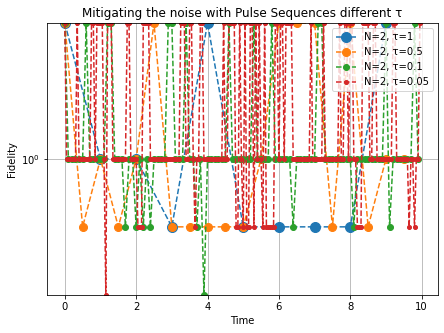

In [18]:
def TogglingFrameH(params, **kwargs):
    N, TFH = params['N'], []
    Hk, matrx = np.zeros((2**N,2**N)), np.zeros((2, 2))
    pulses, opH = params['pulses'], params['opH']
    for p in pulses:
        for op in opH:
            for i in range(N):
                matrx = sparseMatrices(p@op@(np.linalg.inv(p)))
                Hk += tensorOperators(matrx, a = i, b = N-1-i)
        TFH.append(Hk)
        Hk, matrx = np.zeros((2**N,2**N)), np.zeros((2, 2))
    return TFH

# TFH = TogglingFrameH(params)

def TimeEvolOpForTFH(params, **kwargs):
    TFH, unitary_timeOp, expTFH, tau, n = kwargs['TFH'], [], np.eye(2**params['N']), params['tau'], params['n']
    for i, hk in enumerate(TFH):
        expTFH = expm(-1j*tau*hk/n) @ expTFH
    t_list = np.arange(0, 10, tau)
    unitary_timeOp = [np.linalg.matrix_power(expTFH, i) for i, t in enumerate(t_list)]
    return unitary_timeOp, t_list
unitary_timeOp, t_list = TimeEvolOpForTFH(params, TFH = TogglingFrameH(params))

params['N'] = 2
params['n'] = 2
params['pulses'] = [I, Z]
params['opH'] = [X, Y]
params['alpha'] = 1
n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)

mss=10

# print(params['tau_list'])

plt.figure(figsize=[7,5])
for tau in params['tau_list']:
    params['tau'] = tau
    F = []
    uOp, t = TimeEvolOpForTFH(params, TFH = TogglingFrameH(params))
    psi_t = [normalizeWF(u@psi_nm) for i,u in enumerate(uOp)]
    F = [np.power(np.abs(np.vdot(psi_nm, pt)), 2) for pt in psi_t]
    plt.plot(t, F, "--o", label = f"N={params['N']}, τ={tau}", ms=mss)
    mss -=2
    plt.yscale("log")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Fidelity")
    plt.title("Mitigating the noise with Pulse Sequences different τ")
    plt.grid('on')
plt.show()

In [ ]:
def H_noise(params, **kwargs):
    N = params['N']
    op = params['opH']
    Hnoise = np.zeros((2**N, 2**N))
    for i in range(N):
        Hnoise += tensorOperators(sparseMatrices(op[0]), a = i, b = N-1-i)
    return Hnoise
# print(H_noise(params))    

def utimeOpH(params, **kwargs):
    H = kwargs['H']
    t_list = np.arange(0,1, params['tau'])
    unitary_timeOp = [expm(-1j*t*H) for t in t_list]
    return unitary_timeOp, t_list

def TogglingFrameH(params, **kwargs):
    N, TFH = params['N'], []
    Hk, matrx = np.zeros((2**N,2**N)), np.zeros((2, 2))
    pulses, opH = params['pulses'], params['opH']
    for p in pulses:
        for op in opH:
            for i in range(N):
                matrx = sparseMatrices(p@op@(np.linalg.inv(p)))
                Hk += R[i]*tensorOperators(matrx, a = i, b = N-1-i)
        TFH.append(Hk)
        Hk, matrx = np.zeros((2**N,2**N)), np.zeros((2, 2))
    return TFH
# TFH = TogglingFrameH(params)
# print(TFH)

def avgHFromTogglingFrameH(params, **kwargs):
    n = params['n']
    N = params['N']
    avgH = np.zeros((2**N, 2**N))
    TFH  = kwargs['TFH']
    avgH = sum(TFH)/len(TFH)
    return avgH
# print(avgHFromTogglingFrameH(params))

def TimeEvolOpForTFH(params, **kwargs):
    TFH, unitary_timeOp, expTFH, tau, n, T = kwargs['TFH'], [], np.eye(2**params['N']), params['tau'], params['n'], params['T']
    for i, hk in enumerate(TFH):
        expTFH = expm(-1j*tau*hk/n) @ expTFH
    t_list = np.arange(0, 10, tau)
    unitary_timeOp = [np.linalg.matrix_power(expTFH, i) for i, t in enumerate(t_list)]
    return unitary_timeOp, t_list
unitary_timeOp, t_list = TimeEvolOpForTFH(params, TFH = TogglingFrameH(params))
    
def F_tvals(params, **kwargs):
    H, Utop_present = kwargs['H'], kwargs['Utop_present']
    H_present = kwargs['H_present']
    F_t, Ft2, T_list, UToP = [], [], [], []
    for i in params['tau_list']:
        params['tau'] = i
        if H_present == 'True':
            unitary_timeOp, t_list = utimeOpH(params, H = H)
        elif Utop_present == 'True':
            unitary_timeOp, t_list = TFHutimeOp(params, H = H)
        UToP.append(unitary_timeOp)
        T_list.append(t_list)
        psi_t = [normalizeWF(np.matmul(unitary_timeOp[i],psi_nm)) for i in range(len(unitary_timeOp))]
        F_t.append([np.power(np.vdot(psi_nm, pt), 2) for pt in psi_t])
#         Ft2 = [1-f for i in range(len(F_t)) for f in F_t[i]]
#         t_list = [(i**2)*j**2 for j in t_list]
#         plt.figure(figsize=[7,5])
#         plt.plot( t_list, Ft2, label = f"N={params['N']}, τ={params['tau']}")
#         plt.xlabel("$\mathregular{(τT)^2}$")
#         plt.ylabel("$\mathregular{(1 - F)}$")
#         plt.grid('on')
#         plt.legend()
        Ft2 = []
    plt.show()
    return unitary_timeOp, psi_t, F_t, Ft2, T_list, UToP

def plottingFidelityVsTaus(params, **kwargs):
    Utop_present = kwargs['Utop_present']
    H_present = kwargs['H_present']
    unitary_timeOp, psi_t, F_t, Ft2, T_list, UToP = F_tvals(params, H = H, H_present = H_present, Utop_present = Utop_present)
    plt.figure(figsize=[7,5])
    plt.xlabel("Time")
    plt.ylabel("Fidelity")
    plt.title("Mitigating the noise with Pulse Sequences different τ")
    plt.grid('on')
    for i in range(len(F_t)):
        plt.plot( T_list[i], F_t[i], label = f"N={params['N']}, τ={params['tau_list'][i]}")
        plt.legend()
    plt.show()
    pass

params['opH'] = [X, Y, Z]
params['pulses'] = [I, X, Y, Z]
params['n'] = 4
# H = avgHFromTogglingFrameH(params, TFH = TogglingFrameH(params))
# plottingFidelityVsTaus(params, H = H, H_present = 'True', Utop_present = 'False')
# print(utimeOp(params, H = H, H_present = 'True', Utop_present = 'False'))
# print(H)

plottingFidelityVsTaus(params, H = H, H_present = 'False', Utop_present = 'True')
# print(TFHutimeOp(params, H = H, H_present = 'True', Utop_present = 'False'))
# print(H)

In [ ]:
params['N'] = 5
params['opH'] = [X]
params['pulses'] = [I, Z]
params['n'] = 2
n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)
def TogglingFrame_Ising(params, **kwargs):
    N = params['N']
    TFH = []
    pulses = params['pulses']
    for p in pulses:
        Hk, matrx1, matrx2 = np.zeros((2**N, 2**N), dtype=complex), np.zeros((2, 2)), np.zeros((2, 2)) 
        for op in params['opH']:
            for i in range(N-1):
                matrx1 = sparseMatrices(op)
                matrx2 = sparseMatrices(op)
                if N%2 == 0:
                    if i%2 == 0 and (i+1)%2 != 0:
                        matrx1 = sparseMatrices(p@op@(np.linalg.inv(p)))
                    elif (i+1)%2 == 0 and (i%2!=0):
                        matrx2 = sparseMatrices(p@op@(np.linalg.inv(p)))
                elif N%2!=0:
                    if i%2 == 0 and (i+1)%2 != 0:
                        matrx2 = sparseMatrices(p@op@(np.linalg.inv(p)))
                    elif (i+1)%2 == 0 and (i%2!=0):
                        matrx1 = sparseMatrices(p@op@(np.linalg.inv(p)))
                Hk += reduce(sp.kron, (sp.eye(2**i), matrx1, matrx2, sp.eye(2**(N-2-i))))
        TFH.append(Hk)
    return TFH
# print(TogglingFrame_Ising(params))

# H = avgHFromTogglingFrameH(params, TFH = TogglingFrame_Ising(params))
# plottingFidelityVsTaus(params, H = H, H_present = 'True', Utop_present = 'False')

# H = utopFromTFH(params, TFH = TogglingFrame_Ising(params))
# plottingFidelityVsTaus(params, H = H, H_present = 'False', Utop_present = 'True')

In [ ]:
lst = [np.eye(1), X, X, np.eye(1)]
XX = reduce(np.kron, lst)
print(XX)

lst = [np.eye(1), Y, Y, np.eye(1)]
YY = reduce(np.kron, lst)
print(YY)

print(XX+YY)

In [ ]:
# Using Walsh Indices

# Generates WI and stores as a col vector in dictionary corresponding to the site [key]
def WalshIndicesGenerate(params, **kwargs):
    N = params['N']
    n = params['n']
    qbit_wi = {}
    for i in range(N):
        qbit_wi[i] = np.full(n, i)
    return qbit_wi
# print(WalshIndicesGenerate(params))
# qbit_wi = WalshIndicesGenerate(params)

### Functions below are useful to construct the avg. H from WI

# Generates WI to decouple within a given cutoff
def WI_Decouple_cutoff(params, **kwargs):
    N, n, cutoff_dist = params['N'], params['n'], kwargs['cutoff_dist']
    WIR_x, WIR_y, wirx, wiry = [], [], [], []
    for i in range(0, N, 1):
        if i%cutoff_dist <= cutoff_dist-1: 
            wirx.append(i%(cutoff_dist))
            wiry.append(i%(cutoff_dist))
            if i%(cutoff_dist)+1 == cutoff_dist:
                WIR_x.append(wirx)
                WIR_y.append(wiry)
                wirx, wiry = [], []
    return (WIR_x, WIR_y)

# print(WI_Decouple_cutoff(params, cutoff_dist = 3))
# WIR = WI_Decouple_cutoff(params, cutoff_dist = 3)

# Generates the terms in H for WI with cutoff
def HamiltonianTermFromWI_cutoff(params, **kwargs):
    N, matrx, WIR = params['N'], kwargs['matrx'], kwargs['WIR']
    lst, Lfinal = [I]*N, []
    for wir in WIR:
        for j in range(len(wir)):
            for k in range(j+1, len(wir), 1):
                if wir[k]==wir[j] and k!=j:
                    lst[k] = matrx
                    lst[j] = matrx
                    Lfinal.append(lst)
                    lst = [I]*N                   
    return Lfinal
# print(HamiltonianTermFromWI_cutoff(params, cutoff_dist = 4, matrx = X, WIR = [[0, 0, 2, 0], [0, 1, 0]]))

# This function gives the final H given a walsh_seq with a cutoff dist. 
def WI_HamiltonianFinal(params, **kwargs):
    N = params['N']
    H, cutoff_dist, matrxs, lst = np.zeros((2**N, 2**N)), kwargs['cutoff_dist'], kwargs['matrxs'], []
    WIR = WI_Decouple_cutoff(params, cutoff_dist = cutoff_dist)
    for matrx in matrxs:
        for w in WIR:
            lst = HamiltonianTermFromWI_cutoff(params, cutoff_dist = cutoff_dist, matrx = matrx, WIR = w)
            for l in lst:
                H += reduce(sp.kron, l)      
    return H
# print(WI_HamiltonianFinal(params, cutoff_dist = 3, matrxs = [X, Y]))

# WI_Sequence(params, WIR = WI_Decouple_cutoff(params, cutoff_dist = 3))
# WI_seq, c = {}, 0
# for i in WIR_x:
#     WI_seq[c] = qbit_wi[i]
#     c+=1
# print(WI_seq)

In [60]:
H = np.array([[1, 1], [1, -1]])

def WF_Conditions(tupleprdt, **kwargs): # tupleprdt is a list
    for i, tprdt in enumerate(tupleprdt):
        if tprdt[0] == tprdt[1] == 1:
            tupleprdt[i] = I
        elif tprdt[0] == -tprdt[1] == 1:
            tupleprdt[i] = X
        elif -tprdt[0] == tprdt[1] == 1:
            tupleprdt[i] = Y
        elif tprdt[0] == tprdt[1] == -1:
            tupleprdt[i] = Z
    return tupleprdt   
# print(WF_Conditions(tupleprdt = [(1,1), (1,-1)]))

def WF_Generate(params, **kwargs):
    N, lst, W_x, W_y, tupleprdt = params['N'], [H], kwargs['W_x'], kwargs['W_y'], []
    power = max(W_x, W_y)
    lst = lst*power
    Hf = reduce(np.kron, lst)
    w_x, w_y = Hf[W_x], Hf[W_y]
    for i, h in enumerate(w_x):
        tupleprdt.append((h, w_y[i]))
    tupleprdt = WF_Conditions(tupleprdt)
    return tupleprdt
# print(WF_Generate(params, W_x = 1, W_y = 2))
    
def WF_WIList(params, **kwargs):
    W_x, W_y, tupleprdt, ps = kwargs['W_x'], kwargs['W_y'], [], [[]]
    for i, w_x in enumerate(W_x):
        tupleprdt.append(WF_Generate(params, W_x = w_x, W_y = W_y[i]))
    ps = [[] for _ in range(len(max(tupleprdt,key=len)))]
    padded_tupleprdt = list(zip(*itertools.zip_longest(*tupleprdt, fillvalue=I)))
    for i, p in enumerate(ps):
        for j, padded_ps in enumerate(padded_tupleprdt):
            ps[i].append(padded_ps[i])
    return ps

WF_WIList(params, W_x = [1, 1, 1], W_y = [2, 1, 1])

[[array([[1, 0],
         [0, 1]]),
  array([[1, 0],
         [0, 1]]),
  array([[1, 0],
         [0, 1]])],
 [array([[ 0.+0.j, -0.-1.j],
         [ 0.+1.j,  0.+0.j]]),
  array([[ 1,  0],
         [ 0, -1]]),
  array([[ 1,  0],
         [ 0, -1]])],
 [array([[0, 1],
         [1, 0]]),
  array([[1, 0],
         [0, 1]]),
  array([[1, 0],
         [0, 1]])],
 [array([[ 1,  0],
         [ 0, -1]]),
  array([[1, 0],
         [0, 1]]),
  array([[1, 0],
         [0, 1]])]]

In [16]:
lst = (I, Z) # Check how to create arrays of matrices of same type and use it for creating Walsh Functions
print(reduce(np.kron, lst))

[[ 1  0  0  0]
 [ 0 -1  0  0]
 [ 0  0  1  0]
 [ 0  0  0 -1]]


In [ ]:
lst = [[]]*3
print(lst)

In [ ]:
np.array(list(itertools.zip_longest(*alist, fillvalue='dummy'))).T